# Logistic Regression on Funding Class

This notebook builds a binary classification target from `amount_usd` and trains a logistic regression model.

**What happens here**
- Load the cleaned dataset.
- Create a binary label: `1` if funding is above the median, else `0`.
- One-hot encode categorical features.
- Train a logistic regression classifier.
- Evaluate with accuracy and ROC-AUC.
- Visualize the ROC curve and a confusion matrix.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
data_path = r"d:\\jjjjjj\\Intership_Calls\\Data_Processing\\cleaned_startup_data_clean.csv"
df = pd.read_csv(data_path)
df.shape

(2225, 11)

In [3]:
# Parse date and build simple time features
date_parsed = pd.to_datetime(df["date"], errors="coerce")
df["year"] = date_parsed.dt.year.fillna(-1).astype(int)
df["month"] = date_parsed.dt.month.fillna(-1).astype(int)

# Define the binary target using the median funding amount
median_amount = df["amount_usd"].median()
df["funding_high"] = (df["amount_usd"] > median_amount).astype(int)

# Select a compact set of features
feature_cols = ["industry_vertical", "sub_vertical", "city_location", "investment_type", "year", "month"]
features = df[feature_cols].copy()

# Fill missing values
for col in features.columns:
    if features[col].dtype == object:
        features[col] = features[col].fillna("unknown")
    else:
        features[col] = features[col].fillna(0)

# One-hot encode categoricals
X = pd.get_dummies(features, drop_first=False)
y = df["funding_high"]
X.shape

(2225, 2174)

In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train logistic regression
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Evaluate
proba = clf.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)
acc = accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, proba)
acc, auc

d:\jjjjjj\Intership_Calls\Data_Processing\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8539325842696629, 0.8875590837474245)

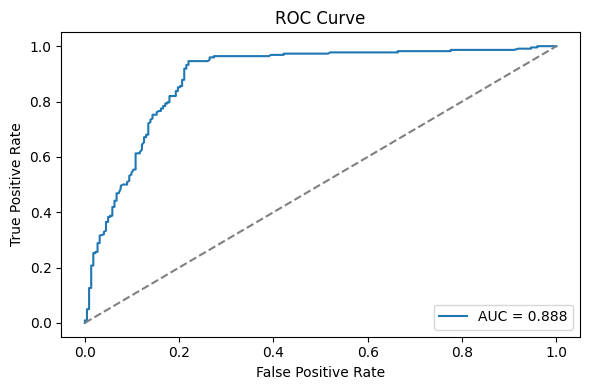

In [5]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

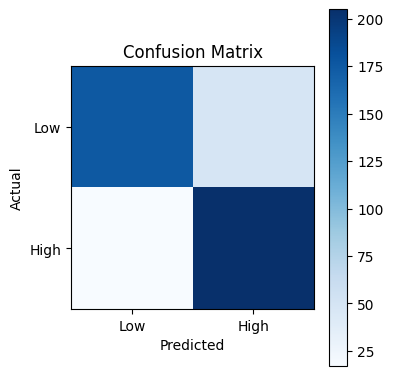

In [6]:
# Confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Low", "High"])
plt.yticks([0, 1], ["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()